<a href="https://colab.research.google.com/github/nssn96/ML_iris/blob/main/ML_iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Assignmet 1 - Iris dataset


*   Name : Surya Narayanan Nadhamuni Suresh
*   UTA ID : 1001877873


In [322]:
#import statements
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
%matplotlib inline

In [323]:
#loading the iris dataset
iris_dataset=load_iris()
print(type(iris_dataset))

<class 'sklearn.utils.Bunch'>


In [324]:
#storing features and target of iris dataset separately
x = pd.DataFrame(iris_dataset.data)  # x is in matrix format
y=pd.DataFrame(iris_dataset.target)   # y is in a vector format
x.columns=['sepal_length','sepal_width','petal_length','petal_width']
y.columns=['target']
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [325]:
#converting to dataframe
# data = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],columns= iris_dataset['feature_names'] + ['target'])
# #data['species'] = pd.Categorical.from_codes(iris_dataset.target,iris_dataset.target_names)
# data.columns=['sepal_length','sepal_width','petal_length','petal_width','target']
# data

In [326]:
#splitting the data into train and test set
data, target = iris_dataset.data, iris_dataset.target
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.1, random_state=1,stratify = y)

# Training

Linear Discriminant Analysis(LDA) - supervised ML algorithm used commonly for dimensionality reduction

In [327]:
#class definition for Linear regression
class LDA:

  def fit(self,data,target,n_comp=2):
    self.n_comp=n_comp
    self.discriminants = None

    n = data.shape[1]
    labels = np.unique(target)
    #print(labels)
    #print('check 0')
    mean_all = np.mean(data,axis=0)
    #print(mean_all)

    #scatter_intra--> the scatter matrices for between class
    #scatter_inter--> the scatter matrices for in-class
    scatter_intra = np.zeros((n,n))
    scatter_inter = np.zeros((n,n))
    #print('check1')

    for i in labels:
      xi = data[target == i]
      #print('check2')
      #xi.drop("target", axis=1, inplace=True)
      
      #xi = np.flatnonzero(target == labels[i])
      #print(xi)
      #print('check3')
      mean_each = np.mean(xi,axis=0)
      #print(type(mean_each))
      #print('check4')
      #scatter_inter = np.sum( ((xi-mean_each).T) @ (xi-mean_each) )
      scatter_inter += ((xi-mean_each).T).dot(xi-mean_each) 
      #scatter_inter += (xi-mean_each).dot((xi-mean_each).T)
      #print('check5')
      #print(scatter_inter)
      
      m = xi.shape[0]
     
      mean_diff = (mean_each - mean_all).reshape(n,1)
      
      #scatter_intra = np.sum( m * (mean_diff @ (mean_diff.T))  )
      scatter_intra +=  m * (mean_diff.dot(mean_diff.T))  
      #print('check6')
    
    
    #determin scatter_inter^-1 * scatter_intra
    #print(scatter_inter)
    Z = np.linalg.inv(scatter_inter).dot(scatter_intra)
    print(Z)
    
    #getting eigenvalues and vectors
    e_values,e_vectors = np.linalg.eig(Z)
    
    #transposing for easy calculation and arranging in descending order
    e_vectors = e_vectors.T
    index = np.argsort(abs(e_values))[::-1]
    e_values = e_values[index]
    e_vectors = e_vectors[index]
    
    #we only want eigenvectors of first n-components
    self.discriminants = e_vectors[:n_comp]

  def predict(self,data):
    pass

  def transform(self,data):
    return np.dot(data,self.discriminants.T)


[[ -2.7374397    0.98920626  -7.16621712  -3.00526707]
 [ -5.55670076   2.15290089 -14.71099928  -6.12038602]
 [  8.50517537  -3.08288298  22.27600981   9.33861416]
 [ 10.32831437  -3.31349339  26.56305709  11.28095755]]
Original size of the data :  (135, 4)
size of the transformed data after dimensionality reduction :  (135, 2)


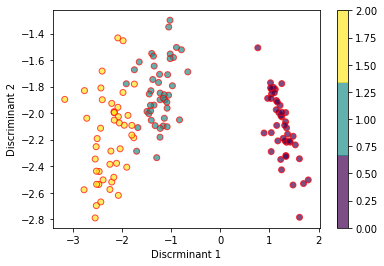

In [328]:
#Testing for LDA
model = LDA()
#print(x_train)
model.fit(x_train,y_train)
data_projected = model.transform(x_train)

print("Original size of the data : ",x_train.shape)
print("size of the transformed data after dimensionality reduction : ",data_projected.shape)

d1,d2 = data_projected[:,0] , data_projected[:,1]

plt.scatter(d1,d2,c=y_train , edgecolor='red', alpha=0.7 ,cmap=plt.cm.get_cmap("viridis", 3))
plt.xlabel('Discrminant 1')
plt.ylabel('Discriminant 2')
plt.colorbar() ;plt.show()

# Logistic Regression

In [329]:
##class definition for Logistic regression
class LogisticRegression:

  def fit(self,data,target,steps=100):
    self.alpha=0.001 #learning rate
    n = data.shape[0]  # number of training examples
    m = data.shape[1]
    self.w = np.zeros(m)
    self.b = 0

    for i in range(steps):
      #applying the sigmoid function (prediction)
      temp = np.dot(data,self.w)+self.b
      #print('check1')
      target_pred = self.sigmoid(temp)
      #print('check2')

      #getting the gradients wrt to loss

      dw = (1/n) * np.dot(data.T, (target_pred-target))
      #print('check3')
      db = (1/n) * np.sum(target_pred - target)

      #Updating the parameters of w and b
      self.w = self.w - self.alpha * dw
      #print('check4')
      self.b = self.b - self.alpha * db
   

  def predict(self,data):
    target_pred = self.sigmoid(np.dot(data,self.w)+self.b)
    #print('check5')
    target_pred_new = [1 if i > 0.5 else 0 for i in target_pred]
    return np.array(target_pred_new)

  

  def sigmoid(self,z):
    return 1.0/(1+np.exp(-z))
  
  def loss(y,yp):
    l = -np.mean(y*(np.log(yp)) - (1-y) * np.log(1-yp))
    return l



In [330]:
#splitting the data into train and test set
data, target = iris_dataset.data, iris_dataset.target
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.1, random_state=123,stratify = y)

#Testing for Logistic regression
from sklearn.metrics import accuracy_score
model_log = LogisticRegression()
model_log.fit(x_train,y_train)

pred = model_log.predict(x_test)
#print(pred)
#print(y_test)
accuracy = np.sum(y_test == pred) / len(y_test)
#score = accuracy_score(y_test, pred, normalize=False)

print('The accuracy of the Logistic model is ',accuracy*100)


The accuracy of the Logistic model is  33.33333333333333


# Naive Bayes

In [331]:
# class definition for Naive Bayes
#refrences Used
#https://towardsdatascience.com/implementing-naive-bayes-from-scratch-df5572e042ac
class NaiveB:

  def fit(self,data,target):
    n,m = data.shape
    self.labels = np.unique(target)
    self.len_labels = len(self.labels)
    #print('check1')

    #calculate mean , variance and prior for each classes
    self.mean = np.zeros((self.len_labels,m))
    self.variance =  np.zeros((self.len_labels,m))
    self.prior = np.zeros(self.len_labels)
    #print('check2')

    for i in range(self.len_labels):
      #creating a subset of data specific to one class
      xi = data[target == i]
      #print(xi)
      #print('check3')
      #calculating the required statistics
      self.mean[i, :] = np.mean(xi, axis=0)
      self.prior[i] =  xi.shape[0] / n
      self.variance[i,:] = np.var(xi, axis=0)
    
  
  def predict(self,data):
    y_pred = [self.get_prob(x) for x in data]
    return np.array(y_pred)
  
  def get_prob(self,data):
    posteri = list()

    for i in range(self.len_labels):
      mean = self.mean[i]
      prob_prior = np.log(self.prior[i])
      variance = self.variance[i]
      #print('check4')

      prob_posterior = np.sum(np.log(self.density(data, mean, variance)))
      #print('check5')
      prob_posterior = prob_prior + prob_posterior
      posteri.append(prob_posterior)

    # we should return the index with highest class probability
    return np.argmax(posteri)

  #this function is used for calculating the gaussian density
  def density(self,data, mean,var):
    #gaussian density function
    constant = 1/ np.sqrt(var*2*np.pi)
    #print('check6')
    p = np.exp(-0.5 * ((data - mean) ** 2 / var))
    return constant * p








In [332]:
# #splitting the data into train and test set
# data, target = iris_dataset.data, iris_dataset.target
# #x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2, random_state=1,stratify = y)
# X_train, X_test, y_train, y_test = train_test_split(
#         data, target, test_size=0.2, random_state=123
#     )

# # Testing for Naive bayes model
# nb = NaiveB()
# nb.fit(X_train,y_train)
# pred = nb.predict(X_test)

# accuracy = np.sum(y_test == pred) / len(y_test)

# print("The accuracy of the Naive Bayes mode : ", accuracy*100)

def get_accuracy(y, y_pred):
  return np.sum(y==y_pred) / len(y)

 #splitting the data into train and test set
data, target = iris_dataset.data, iris_dataset.target
# x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.1, random_state=1,stratify = y)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=123)
nb = NaiveB()
nb.fit(x_train, y_train)
predictions = nb.predict(x_test)
#print(pred)
#print(y_test)
accuracy = get_accuracy(y_test, predictions)
#accuracy = accuracy_score(predictions,y_test)
print("Naive Bayes classification model accuracy", accuracy*100)


Naive Bayes classification model accuracy 96.66666666666667


In [333]:
# References Used

# •	https://medium.com/analytics-vidhya/exploration-of-iris-dataset-using-scikit-learn-part-1-8ac5604937f8
# •	https://www.statology.org/linear-discriminant-analysis-in-python/
# •	https://www.geeksforgeeks.org/linear-regression-implementation-from-scratch-using-python/#:~:text=Linear%20Regression%20is%20a%20supervised,the%20given%20input%20value%20x
# •	https://stackoverflow.com/questions/464864/how-to-get-all-possible-combinations-of-a-list-s-elements
# •	https://www.geeksforgeeks.org/implementation-of-ridge-regression-from-scratch-using-python/?ref=lbp
# •	https://www.geeksforgeeks.org/python-mean-squared-error/
# •	https://towardsdatascience.com/classification-basics-walk-through-with-the-iris-data-set-d46b0331bf82
# •	https://www.justintodata.com/linear-regression-machine-learning-python-tutorial/
# •	https://www.geeksforgeeks.org/linear-regression-implementation-from-scratch-using-python/#:~:text=Linear%20Regression%20is%20a%20supervised,the%20given%20input%20value%20x
# •	https://github.com/spympr/Linear_Regression/blob/main/AI(II)_Project1_A.ipynb
# •	https://www.section.io/engineering-education/linear-discriminant-analysis/
# •	https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/lda.py
# •	https://isip.piconepress.com/publications/reports/1998/isip/lda/lda_theory.pdf
# •	https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2
# •	https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/logistic_regression.py
# •	https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/naivebayes.py
# https://towardsdatascience.com/implementing-naive-bayes-from-scratch-df5572e042ac
